In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from PIL import Image
import os

In [2]:
def compress(image_path, output_path, bit):
    img = cv2.imread(image_path,0)
    img_arr = np.array(img)


    height, width = img_arr.shape
    h = height
    w = width
    height = height-(height%8)
    width = width-(width%8)
    
    
    img = img.resize((height, width))
  

    compressed = np.zeros_like(img_arr)
    for i in range(0, height, 8):
        for j in range(0, width, 8):
    
            block = img_arr[i:i+8, j:j+8]
            dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho').flatten()
            sorted_coeffs = np.argsort(np.abs(dct_block))
            
            
            
            for mm in range(bit,64):
                    dct_block[mm] = 0
            compressed[i:i+8, j:j+8] = idct(idct(dct_block.reshape((8,8)).T, norm='ortho').T, norm='ortho')

    # Save the compressed image
    compressed_img = Image.fromarray(compressed)
    compressed_img = compressed_img.resize((w,h))
    compressed_img.save(output_path)
    


In [5]:
img_name = 'gray.jpeg'

In [9]:
compress(img_name, 'output1.jpg', 1)
compress(img_name, 'output2.jpg', 2)
compress(img_name, 'output3.jpg', 5)

In [10]:
img = cv2.imread(img_name,0)
com_img1 =  cv2.imread('output1.jpg',0)
com_img2 =  cv2.imread('output2.jpg',0)
com_img3 =  cv2.imread('output3.jpg',0)

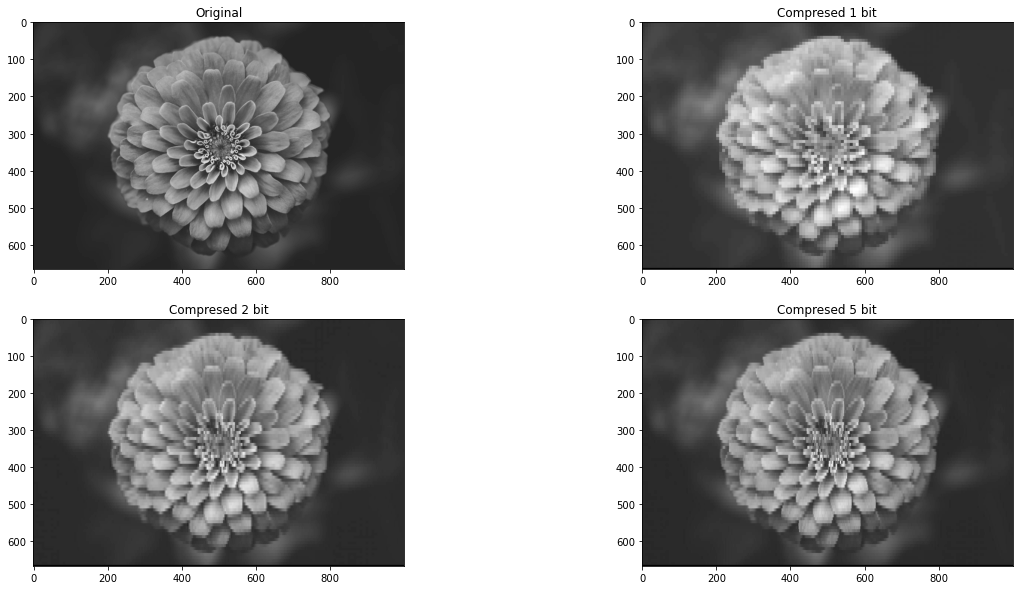

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(com_img1,cmap = 'gray')
plt.title("Compresed 1 bit")
plt.subplot(2,2,3)
plt.imshow(com_img2,cmap = 'gray')
plt.title("Compresed 2 bit")
plt.subplot(2,2,4)
plt.imshow(com_img3,cmap = 'gray')
plt.title("Compresed 5 bit")

plt.show()

In [7]:
path = '/home/rifat/Music/MUL_FINAL/DCT'

In [8]:
cmp1 = os.path.getsize(path + "/output1.jpg") / 1024
cmp2 = os.path.getsize(path + "/output2.jpg") / 1024
cmp5 = os.path.getsize(path + "/output3.jpg") / 1024
original = os.path.getsize(path + "/gray.jpeg") / 1024

## Compression ratio

In [9]:
print(f'Compression ratio 1 dc bit: {original/cmp1:.2f}')
print(f'Compression ratio 2 dc bit: {original/cmp2:.2f}')
print(f'Compression ratio 2 dc bit: {original/cmp5:.2f}')

Compression ratio 1 dc bit: 7.19
Compression ratio 2 dc bit: 5.40
Compression ratio 2 dc bit: 3.47
